<a href="https://colab.research.google.com/github/Jorgemontanez25/PGP-AIML-BA-UTA-Jan25-B/blob/main/EasyVisa_Full_Code_Jorge_Montanez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a  classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data, AI and Machine Learning UT/ Project 3: Advanced Machine Learning: EasyVisa/EasyVisa.csv')

In [ ]:
data=df.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

#### Observation:
There is 12 columns and 25480 rows in the dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


###Observations:

*   There is 9 object type variables and 3 either int or float variables.
*   It seems there is no null values. We can further confirm this using isna() method




In [ ]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


###Observations:

we confirm that there is no null values in the dataframe.

In [ ]:
data = data.drop(columns=['case_id'])


###Observations

The column case_id does not hold any meaningful value for the analysis.

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
#check the statistical summary of the data

data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Observations:

*   The average number of employees at companies that submitted applications as sponsors for work visas is approximately 5,667. However, there appears to be an error in the data, as it's not possible to have -26 employees, which is the recorded minimum.
*   Additionally, 75% of the companies were established before 2006, based on the year of establishment data.
*   The average prevailing wage offered by these companies is around $74,456 USD per year.
*   The continent with the highest number of applications is Asia.
*   For education_of_employee, the most common education level is Bachelor's.
*   The Northeast is the region with the highest number of employment entries.
*   Year is the most frequently used unit of wage in the dataset.



#### Fixing the negative values in number of employees columns

In [ ]:
#Check how many values in the no_of_employees are below 1

print(data[data['no_of_employees'] < 1]['no_of_employees'].count())

33


In [ ]:
# Drop rows where 'no_of_employees' is less than 1
data = data[data['no_of_employees'] >= 1]

###Observations:
Since there are only 33 rows in 'no_of_employees' with values less than 1—representing less than 1% of the dataset—the simplest and safest approach is to remove those rows.

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
for col in data.select_dtypes(include=['object']):
    print(f"Category Counts for '{col}':")
    counts = data[col].value_counts()
    percentages = (counts / len(data)) * 100
    print(pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage']))
    print("-" * 30)


Category Counts for 'continent':
               Count  Percentage
continent                       
Asia           16840   66.176760
Europe          3727   14.646127
North America   3287   12.917043
South America    851    3.344206
Africa           550    2.161355
Oceania          192    0.754509
------------------------------
Category Counts for 'education_of_employee':
                       Count  Percentage
education_of_employee                   
Bachelor's             10220   40.161905
Master's                9622   37.811923
High School             3416   13.423979
Doctorate               2189    8.602193
------------------------------
Category Counts for 'has_job_experience':
                    Count  Percentage
has_job_experience                   
Y                   14786   58.105081
N                   10661   41.894919
------------------------------
Category Counts for 'requires_job_training':
                       Count  Percentage
requires_job_training                  

###Observations

*   The majority of applications come from Asia (66.1%), followed by Europe and North America.
*   Most applicants hold a Bachelor’s (40%) or Master’s degree (38%), indicating that the dataset mostly contains highly educated professionals.
*   About 58% of applicants have prior job experience, while 42% do not.
*   A large majority (88.4%) of jobs do not require additional training, implying that employers prefer job-ready candidates or roles that assume prior experience/skills.
*   Employment is concentrated in the Northeast, South, and West, which aligns with major U.S. economic hubs.
*   Most wages are reported on a yearly basis (90%), which is expected for salaried positions.
*   A very high proportion (89.4%) of positions are full-time.
*   About 66.8% of applications are certified, while 33.2% are denied.


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Observations on numerical columns

Plotting for: no_of_employees


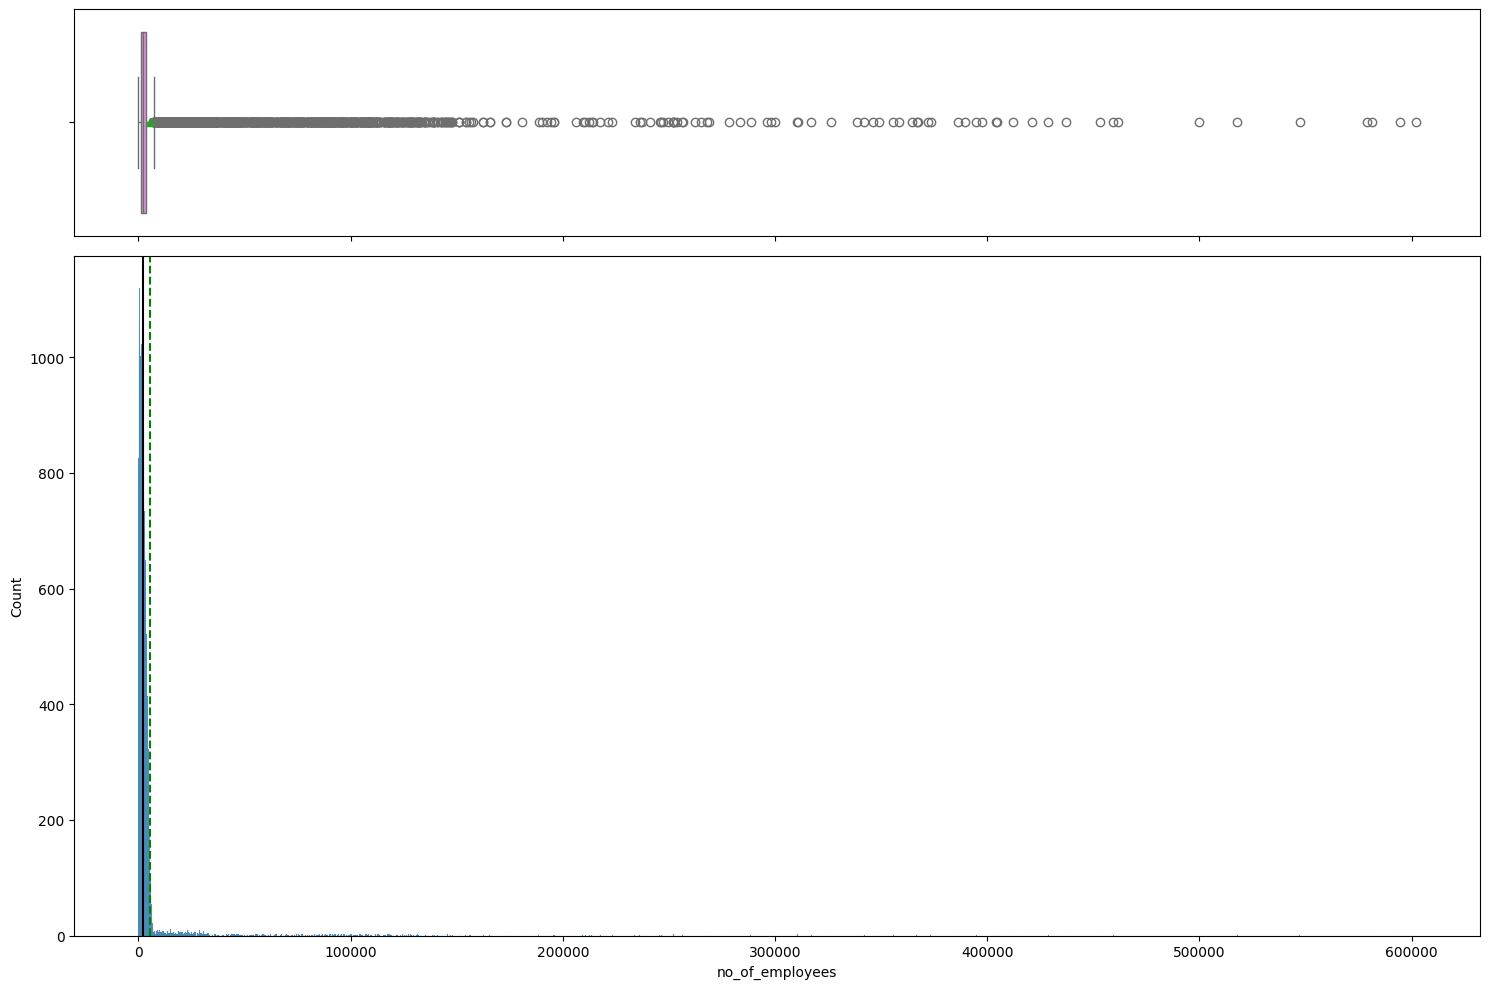

Plotting for: yr_of_estab


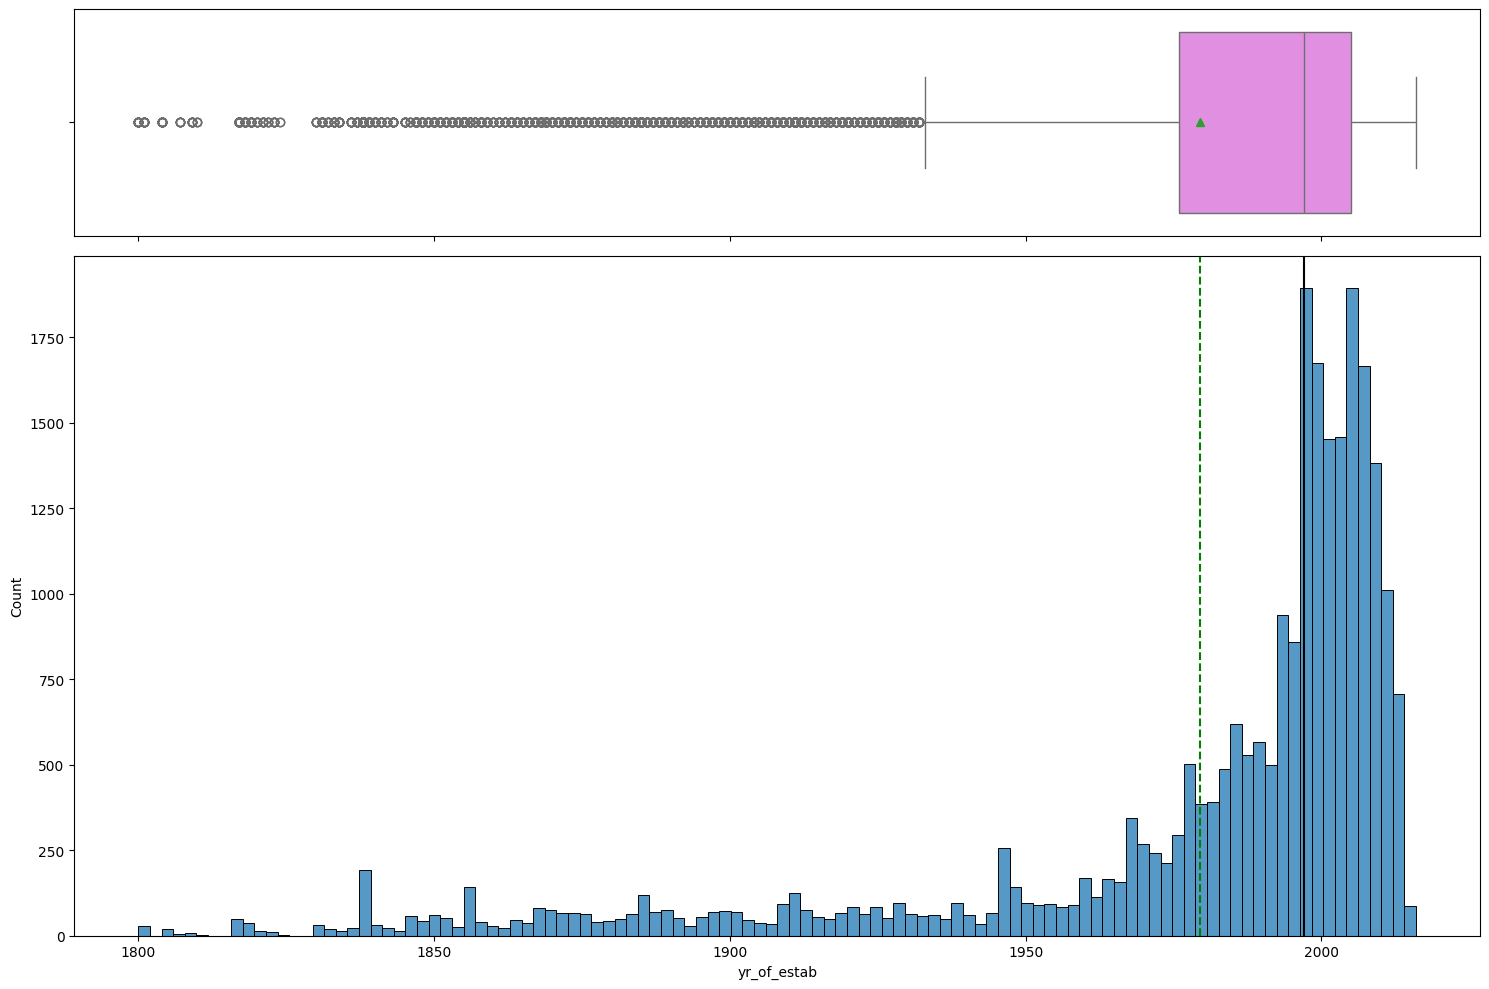

Plotting for: prevailing_wage


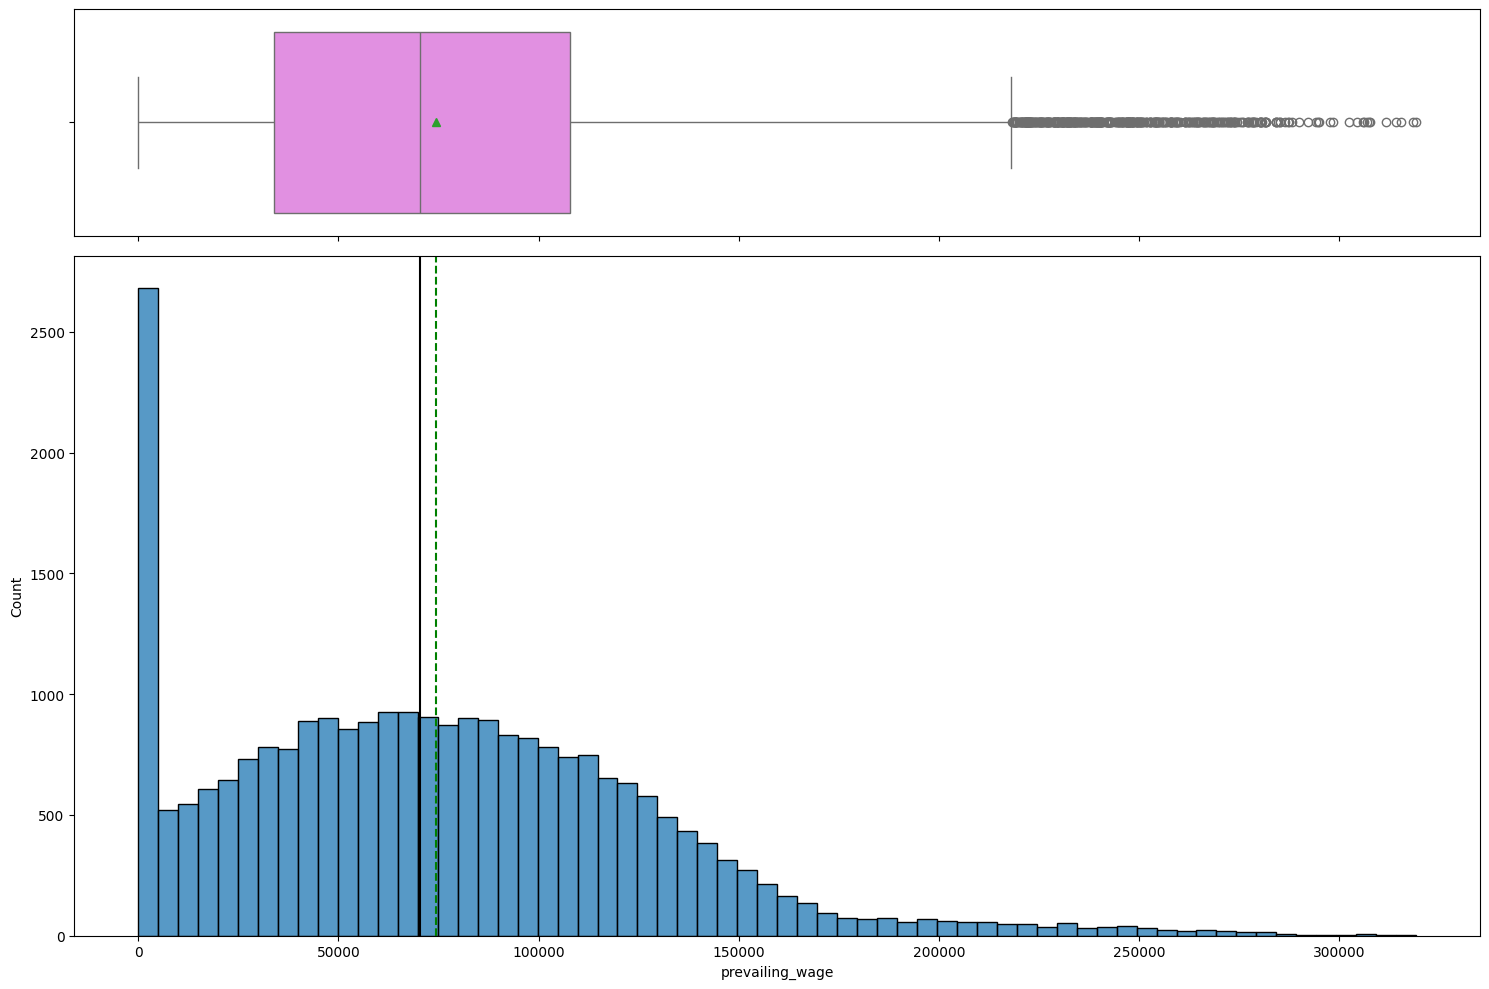

In [ ]:
# Loop through all numeric columns in the DataFrame
for col in df.select_dtypes(include=['number']).columns:
    print(f"Plotting for: {col}")
    histogram_boxplot(data=df, feature=col, figsize=(15, 10))
    plt.tight_layout()
    plt.show()


###Observations
####no_of_employees
*   The distribution is heavily right-skewed, with most companies having a relatively small number of employees.
*   A few extreme outliers exist, with some values exceeding 600,000 employees.

####yr_of_estab
*   Most companies were established after 1975, with a visible spike in the late 1990s to early 2000s.
*   There are a number of establishments dating back to the 1800s, which may be valid but are definitely historical outliers.

####prevailing_wage
*   The distribution is right-skewed, with the majority of wages concentrated between $30,000–$120,000.
*   There is a distinct cluster around very low values (just above $0), which may be data quality issues.







#### Observations on education of employee

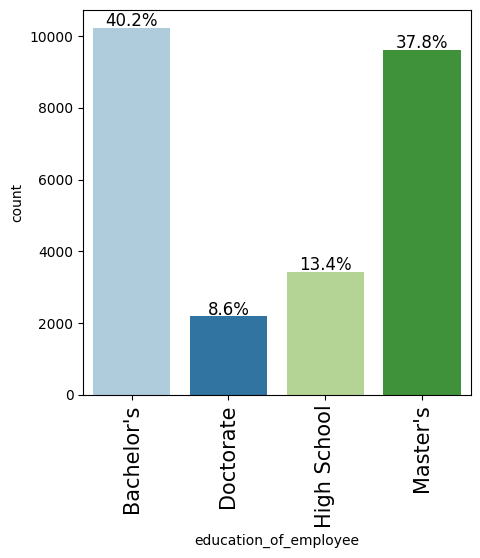

In [ ]:
labeled_barplot(data=data, feature="education_of_employee", perc=True)

###Observations
*   Bachelor's degree holders make up the largest share of applicants at 40.2%, and Master's degree holders follow closely behind at 37.8%.Combined, they represent nearly 78% of all applications, highlighting that the workforce is predominantly highly educated.
*   Only 8.6% of applicants hold a Doctorate,This may suggest that either fewer doctorate-level roles are being offered or fewer candidates at that level are applying for sponsored roles.
*   High School graduates account for just 13.4%,This is likely due to the specialized nature of jobs requiring sponsorship, which typically require a college degree.




#### Observations on region of employment

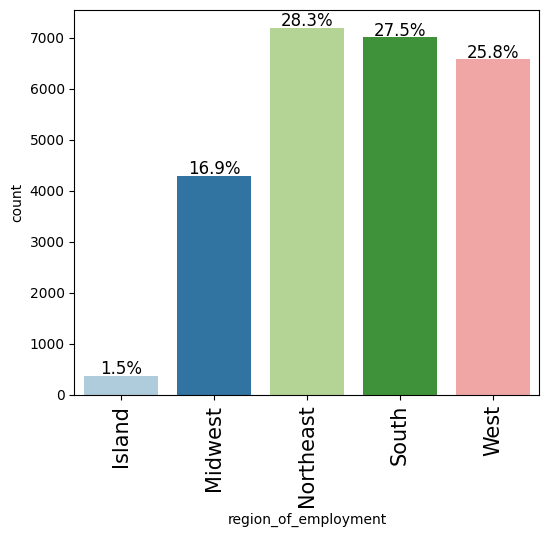

In [ ]:
labeled_barplot(data=data, feature="region_of_employment", perc=True)

###Observations
*   With 28.3% of the total, the Northeast leads in sponsored employment.
*   The South accounts for 27.5%, and the West for 25.8%, indicating strong employer demand in tech and corporate sectors(Texas and California).
*   Only 16.9% of the applications come from the Midwest, suggesting fewer companies sponsoring visas or less demand for international talent in that region.
*   With just 1.5%, this likely includes territories like Puerto Rico or Hawaii, where sponsored positions are much less common.



#### Observations on job experience

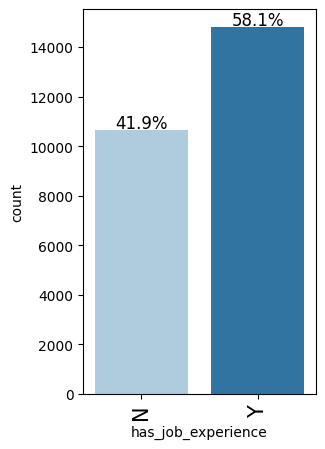

In [ ]:
labeled_barplot(data=data, feature="has_job_experience", perc=True)

###Observations
*   58.1% of individuals have prior job experience (Y), compared to 41.9% without (N).
*   This suggests that most visa sponsorship applicants already possess industry-relevant experience, which is expected in specialized or skilled roles.



#### Observations on case status

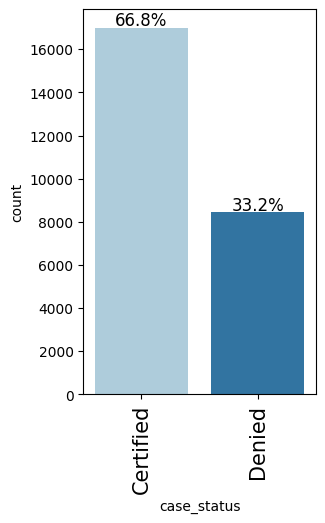

In [ ]:
labeled_barplot(data=data, feature="case_status", perc=True)

###Observations
*   66.8% of the cases are Certified, while 33.2% are Denied.
*   This indicates a relatively high approval rate for work visa sponsorship applications.



### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


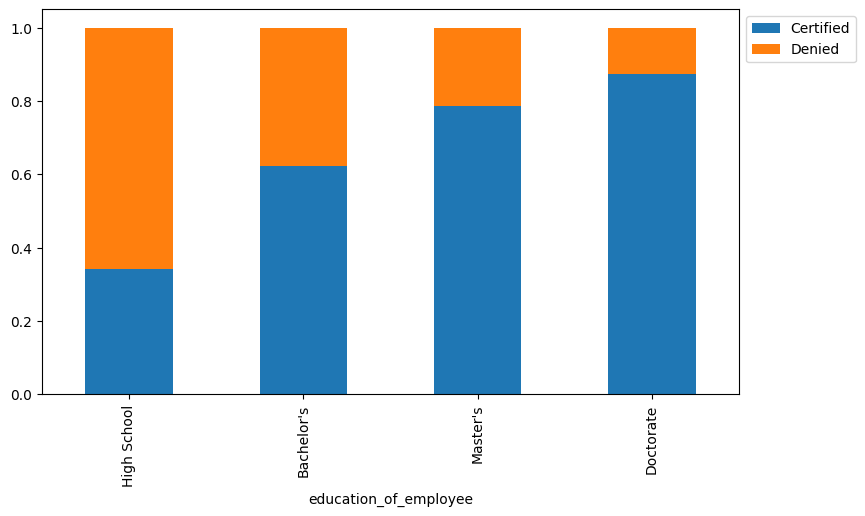

In [ ]:
stacked_barplot(data=data, predictor="education_of_employee", target="case_status")

###Observations
*   Doctorate holders have the highest approval rate, with ~87% certified.
*   Master’s degree holders follow closely with a certification rate of ~78.6%.
*   Bachelor’s degree holders have a notably lower approval rate (~62.3%).
*   The denial rate for High School applicants is about 66%, the lowest certification rate across all education levels.



#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


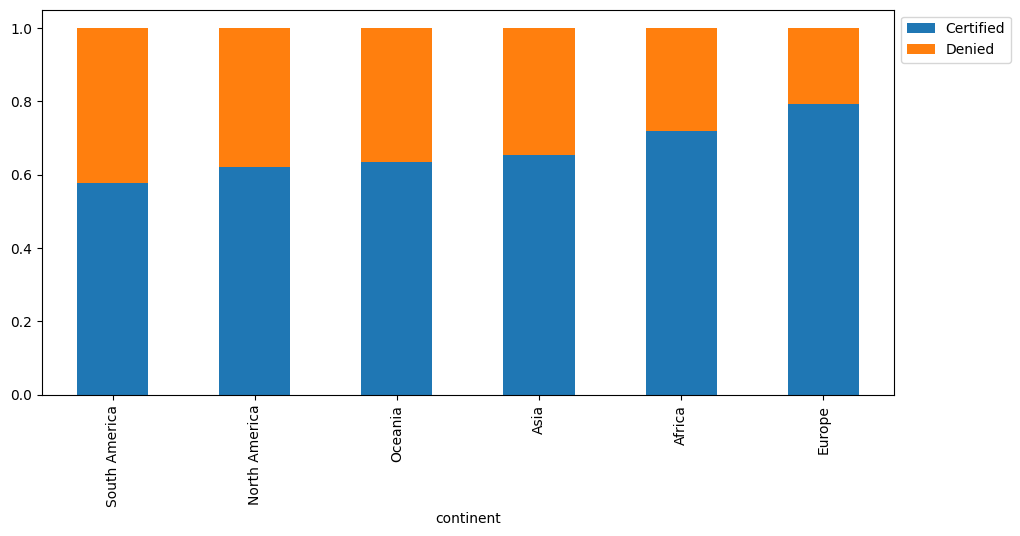

In [ ]:
stacked_barplot(data=data, predictor="continent", target="case_status")

###Observations
*   With 79.3% of applications certified, Europe has the strongest approval performance across all continents.
*   Africa: ~72% certified.
*   Asia: ~65% certified, but with the highest number of total applications.
*   Only 57.8% of applications from South America are certified, the lowest among all continents
*   North America: ~62% certified.
*   Oceania: ~63.5% certified.



#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


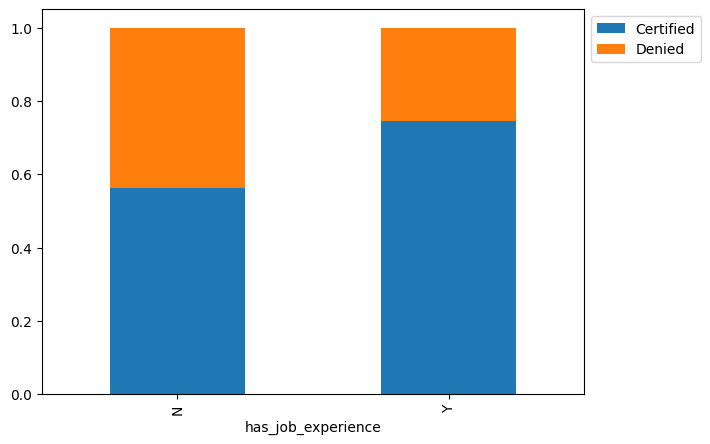

In [ ]:
stacked_barplot(data=data, predictor="has_job_experience", target="case_status")

###Observations
*   Applicants with job experience (Y) have a higher certification rate:
74.5% certified.
*   In contrast, those without experience (N) are certified only 56.2% of the time.




#### Checking if the prevailing wage is similar across all the regions of the US

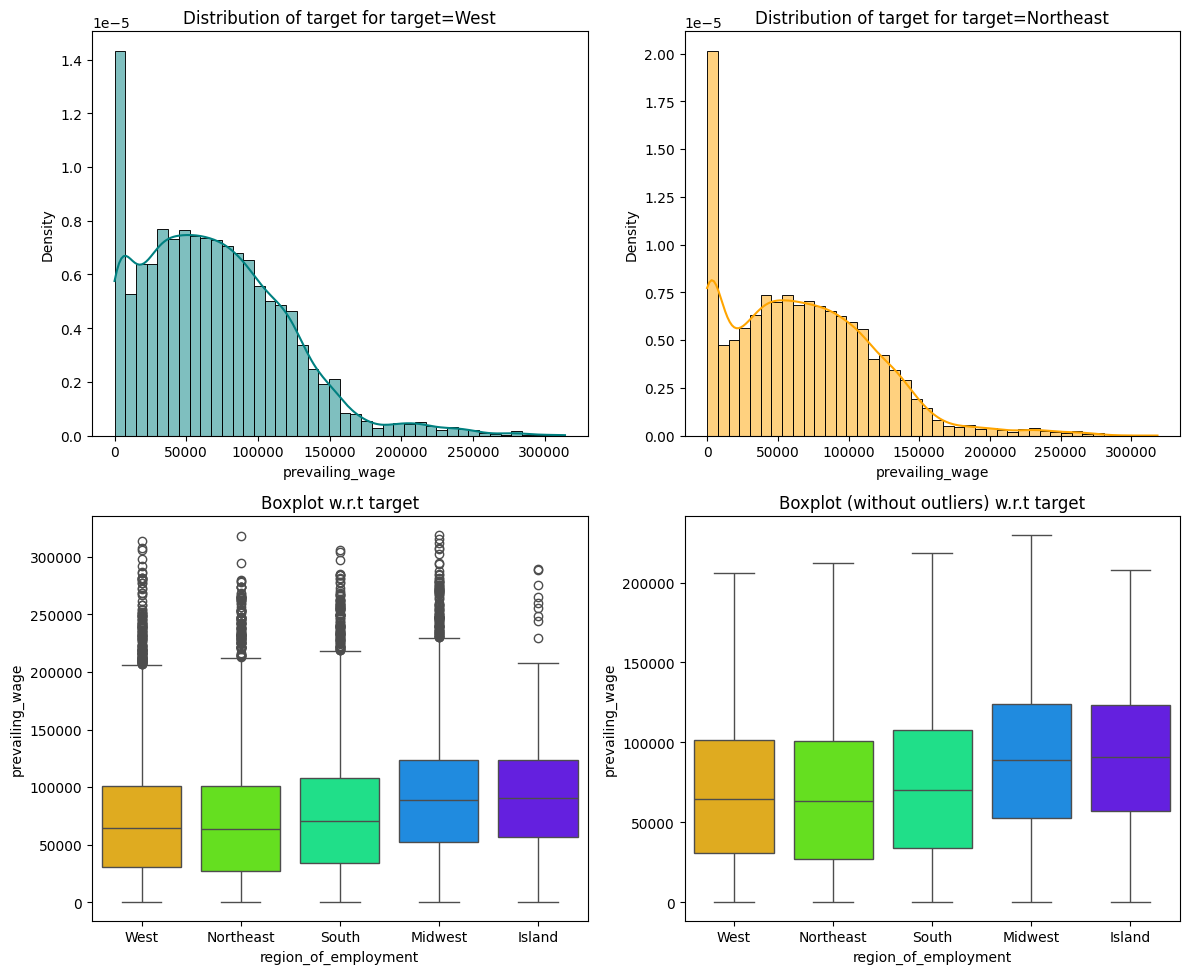

In [ ]:
distribution_plot_wrt_target(data=data, predictor="prevailing_wage", target="region_of_employment")

###Observations
*   Wage distributions in both regions are right-skewed.
*   Slightly higher density of high wages in the Northeast.
*   Median wages vary slightly by region.
*   All regions contain a large number of high-wage outliers, especially the Midwest, suggesting some very well-paying roles skew the distributions.
*   Removing outliers reveals that the Midwest, Island, and South regions offer higher typical wages, Northeast and West fall slightly below in central tendency once extreme values are excluded.
*   Wage ranges are fairly consistent, but with subtle differences that may reflect regional cost of living, industry concentration, or job types.



#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

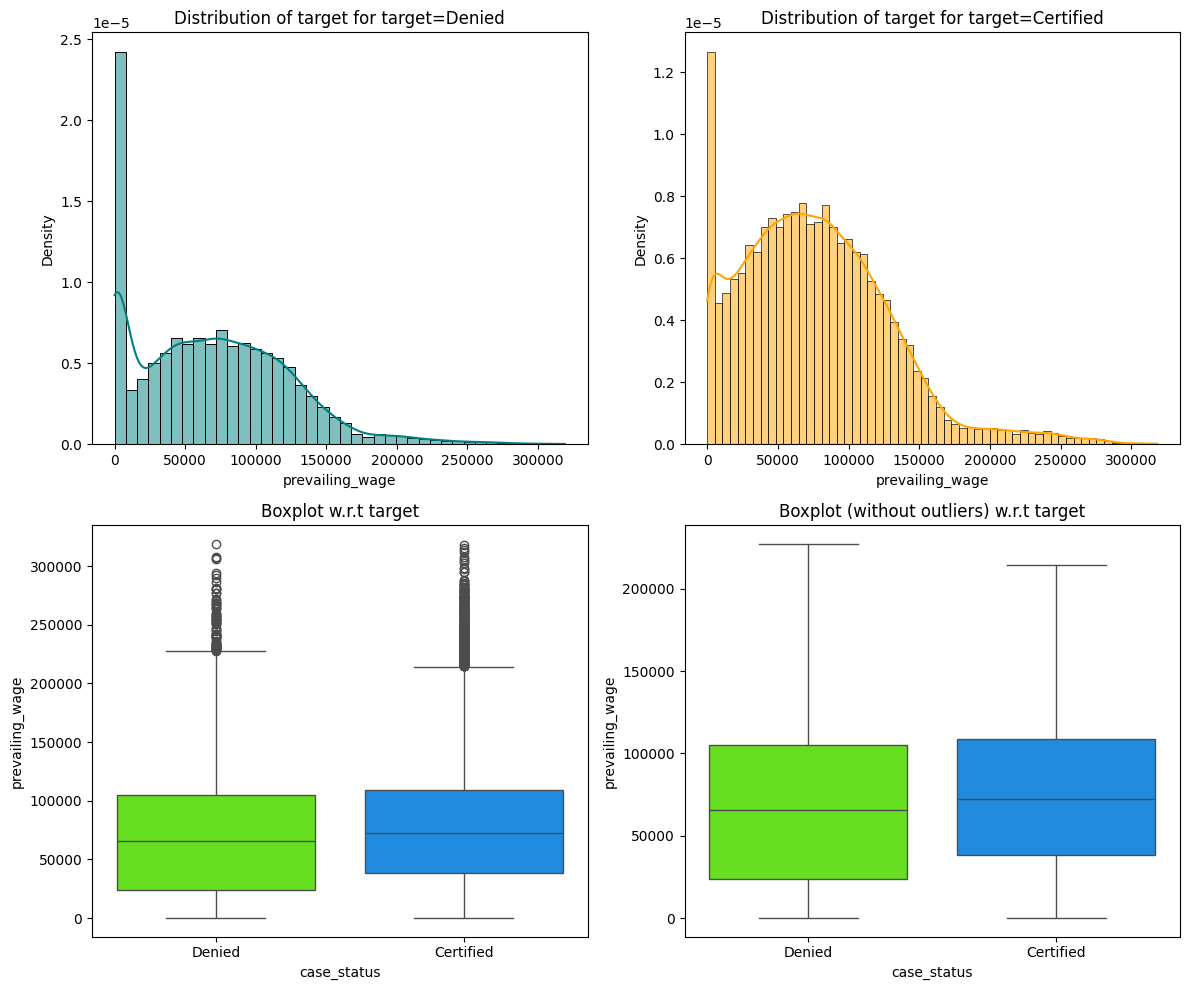

In [ ]:
distribution_plot_wrt_target(data=data, predictor="prevailing_wage", target="case_status")

###Observations
*   Certified cases tend to have higher prevailing wages than denied ones.
*   Both distributions are right-skewed, with a long tail extending to higher wages, but this skew is more extreme for Certified cases.
*   There are numerous high-wage outliers in both categories, but especially for Certified cases
*   Removing outliers makes the central wage distribution clearer and more comparable.



#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


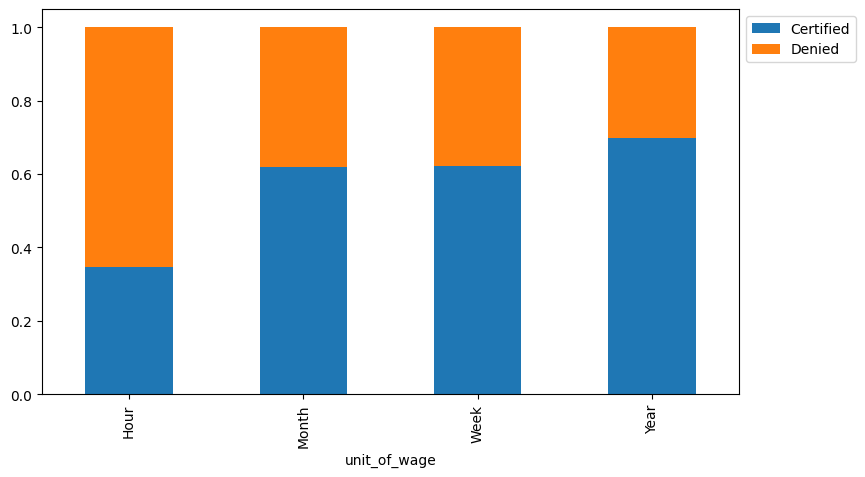

In [ ]:
stacked_barplot(data=data, predictor="unit_of_wage", target="case_status")

###Observations
*   Yearly wages are associated with the highest certification rate, 70% of applications using "Year" as the wage unit were certified.
*   Hourly wage applications face a much higher denial rate, only 35% were certified.
*   Monthly and Weekly units are rare but moderately accepted, both show ~63% certification rates.

## Data Pre-processing

### Outlier Check

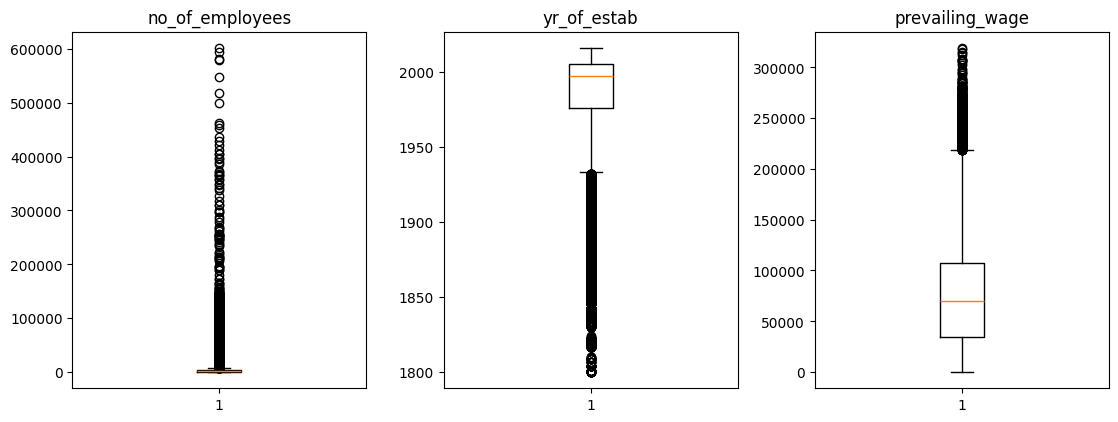

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

##Observations
####no_of_employees
*   The distribution is heavily right-skewed with a large number of extreme outliers
*   Most companies have a relatively small number of employees, but there are outliers with hundreds of thousands.

####yr_of_estab
*   Most companies were established after 1950, with a dense cluster between 1980 and 2010.
*   There are many older companies (1800s–1950s) that are considered outliers in this context.

####prevailing_wage
*   The wage distribution is also right-skewed, with many high-wage outliers above $200,000.

*   The median wage appears to be around $65,000–$70,000.

####Note:
There are some extreme outliers in our numerical variables, but they cannot be assumed to be errors. For instance, it is entirely possible for a large company like Walmart to have over 500,000 employees, and salaries exceeding $300,000 are realistic for executive or director-level positions. Therefore, simply removing these values could be problematic. Instead, we should treat them appropriately to facilitate better data processing and modeling.



In [ ]:
#conversion factors
conversion_factors = {
    'Hour': 2080,
    'Week': 52,
    'Month': 12,
    'Year': 1
}

#Normalize prevailing wage to yearly equivalent
data['wage_annual'] = data.apply(
    lambda row: row['prevailing_wage'] * conversion_factors.get(row['unit_of_wage'], np.nan),
    axis=1
)

#Remove clearly invalid wages (e.g., under $5,000/year)
data = data[data['wage_annual'] > 5000]

#Cap extreme outliers (1st and 99th percentiles)
wage_low = data['wage_annual'].quantile(0.01)
wage_high = data['wage_annual'].quantile(0.99)
data['wage_capped'] = data['wage_annual'].clip(lower=wage_low, upper=wage_high)

#Log-transform for modeling
data['log_wage'] = np.log1p(data['wage_capped'])


###Observations
*   All wage values are now comparable and modeled consistently.
*   Outliers are handled meaningfully.
*   Log-transformed values are ready for regression or classification.





In [ ]:
data.drop(['prevailing_wage', 'unit_of_wage', 'wage_annual', 'wage_capped'], axis=1, inplace=True)


###Observations

For modeling purposes, the log_wage column is often sufficient, as it represents all wage values standardized to an annual scale.

In [ ]:
data['log_no_of_employees'] = np.log1p(data['no_of_employees'])

###Observations
Apply a log transformation to reduce the heavily right-skewed distribution with a long tail. Log transformation dampens the effect of outliers while preserving their rank and relative order.

In [ ]:
data['estab_period'] = pd.cut(data['yr_of_estab'],
                            bins=[0, 1950, 2000, 2025],
                            labels=['Legacy', 'Mature', 'New'])

###Observations

Convert yr_of_estab into categories to reduce noise from irrelevant precision and to simplify the underlying signal.

In [ ]:
data.drop([ 'no_of_employees', 'yr_of_estab'], axis=1, inplace=True)

###Observation
Since we have new columns (log_no_of_employees and estab_period) that provide normalized and grouped values, the original no_of_employees and yr_of_estab columns are no longer needed for our model.

In [ ]:
# Map binary Y/N to 1/0
data['has_job_experience'] = data['has_job_experience'].map({'Y': 1, 'N': 0})
data['requires_job_training'] = data['requires_job_training'].map({'Y': 1, 'N': 0})
data['full_time_position'] = data['full_time_position'].map({'Y': 1, 'N': 0})

# Map case_status to binary target
data['case_status'] = data['case_status'].map({'Certified': 1, 'Denied': 0})

# Convert appropriate columns to 'category' dtype
categorical_columns = [
    'continent',
    'education_of_employee',
    'region_of_employment',
    'estab_period',
    'has_job_experience',
    'requires_job_training',
    'full_time_position',
    'case_status'
]

data[categorical_columns] = data[categorical_columns].astype('category')


###Observations

Convert the binary columns from Y/N values to 1/0, and change the data type of object-type variables to category for more efficient processing and compatibility with modeling algorithms.

### Data Preparation for modeling

In [ ]:
# Categorical columns to encode
categorical_columns = [
    'continent',
    'education_of_employee',
    'region_of_employment',
    'estab_period',
]

# Binary features already mapped to 0/1
binary_columns = [
    'has_job_experience',
    'requires_job_training',
    'full_time_position'
]

# Numerical columns
numeric_columns = [
    'log_wage',
    'log_no_of_employees'
]

# Target column
target_column = 'case_status'


In [ ]:
print("Unique values in data:")
for col in ['continent', 'estab_period', 'education_of_employee', 'region_of_employment']:
    print(f"\n{col} unique values:")
    print(data[col].unique())


Unique values in data:

continent unique values:
['Asia', 'Africa', 'North America', 'Europe', 'South America', 'Oceania']
Categories (6, object): ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

estab_period unique values:
['New', 'Legacy', 'Mature']
Categories (3, object): ['Legacy' < 'Mature' < 'New']

education_of_employee unique values:
['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']

region_of_employment unique values:
['West', 'Northeast', 'South', 'Midwest', 'Island']
Categories (5, object): ['Island', 'Midwest', 'Northeast', 'South', 'West']


In [ ]:

X = data[categorical_columns + binary_columns + numeric_columns]
y = data[target_column]

In [ ]:
# First split: train+val vs test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train vs validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 14956
Validation size: 4986
Test size: 4986


In [ ]:
 #Preprocessing Pipeline
# ------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', binary_columns + numeric_columns)
    ]
)

###Observation
It applies one-hot encoding to categorical variables and passes through numeric and binary features as-is. This ensures the model receives only numerical input, avoids errors from unseen categories, and maintains consistency across training, validation, and test sets.

## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
# Define Models
# ------------------------------

models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': randint(100, 300),
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': randint(2, 10)
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': randint(100, 300),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__max_depth': [3, 5, 7]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 1.0)
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': uniform(0.01, 10),
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        }
    },

}




In [ ]:
 #RandomizedSearchCV + Evaluation
# ------------------------------
best_models = {}
val_scores = {}

for name, cfg in models.items():
    print(f"\n🔍 Running RandomizedSearch for {name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', cfg['model'])
    ])

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=cfg['params'],
        n_iter=10,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=1,
        random_state=42
    )

    search.fit(X_train, y_train)

    print(f"\n✅ Best Params for {name}: {search.best_params_}")

    # Evaluate on validation set
    y_val_pred = search.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores[name] = acc
    print(f"\n📊 Validation Accuracy for {name}: {acc:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_val, y_val_pred)}")

    # Save best model
    best_models[name] = search.best_estimator_



🔍 Running RandomizedSearch for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Params for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 291}

📊 Validation Accuracy for Random Forest: 0.7465

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.46      0.55      1660
           1       0.77      0.89      0.82      3326

    accuracy                           0.75      4986
   macro avg       0.72      0.67      0.69      4986
weighted avg       0.74      0.75      0.73      4986


🔍 Running RandomizedSearch for Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Params for Gradient Boosting: {'classifier__learning_rate': np.float64(0.02692347370813008), 'classifier__max_depth': 5, 'classifier__n_estimators': 137}

📊 Validation Accuracy for Gradient Boosting: 0.7495

Classification Report:
    

In [ ]:
#Final Evaluation on Test Set
# ------------------------------

print("\n🧪 Final Evaluation on Test Set:")
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_test_pred))


🧪 Final Evaluation on Test Set:

Model: Random Forest
              precision    recall  f1-score   support

           0       0.65      0.46      0.54      1661
           1       0.76      0.88      0.82      3325

    accuracy                           0.74      4986
   macro avg       0.71      0.67      0.68      4986
weighted avg       0.73      0.74      0.72      4986


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.65      0.48      0.55      1661
           1       0.77      0.87      0.82      3325

    accuracy                           0.74      4986
   macro avg       0.71      0.67      0.68      4986
weighted avg       0.73      0.74      0.73      4986


Model: AdaBoost
              precision    recall  f1-score   support

           0       0.62      0.40      0.49      1661
           1       0.75      0.88      0.81      3325

    accuracy                           0.72      4986
   macro avg       0.69      0


Confusion Matrix for Random Forest:

Confusion Matrix for Gradient Boosting:

Confusion Matrix for AdaBoost:

Confusion Matrix for Logistic Regression:


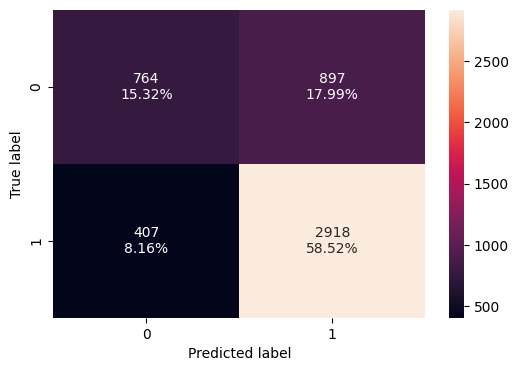

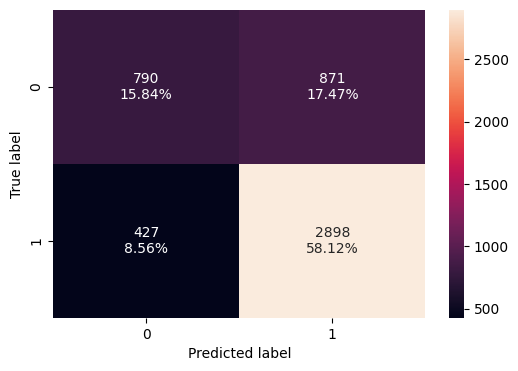

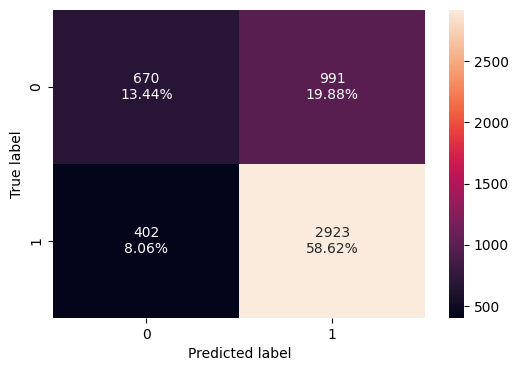

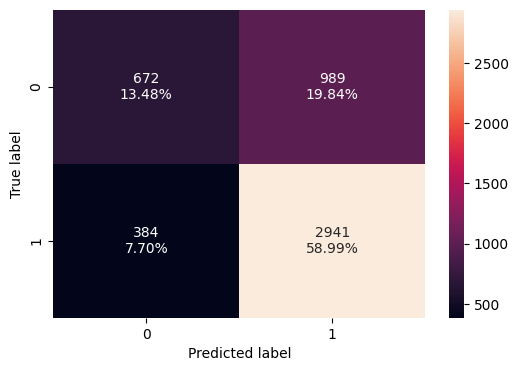

In [ ]:
for name, model in best_models.items():
    print(f"\nConfusion Matrix for {name}:")
    confusion_matrix_sklearn(model, X_test, y_test)

###Observations
For this evaluation, I will prioritize recall as the key performance metric. In the context of visa approval screening, false negatives (i.e., incorrectly denying eligible applications) are more costly than false positives. Therefore, maximizing recall helps ensure that as many qualified candidates as possible are correctly identified and not overlooked.

In [ ]:
print("\n📊 Training and Validation Recall Performance Difference:\n")

for name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    recall_train = recall_score(y_train, y_train_pred)
    recall_val = recall_score(y_val, y_val_pred)
    diff = recall_train - recall_val

    print(f"{name}: Training Recall: {recall_train:.4f}, Validation Recall: {recall_val:.4f}, Difference: {diff:.4f}")




📊 Training and Validation Recall Performance Difference:

Random Forest: Training Recall: 0.9076, Validation Recall: 0.8894, Difference: 0.0182
Gradient Boosting: Training Recall: 0.8823, Validation Recall: 0.8800, Difference: 0.0023
AdaBoost: Training Recall: 0.8873, Validation Recall: 0.8978, Difference: -0.0105
Logistic Regression: Training Recall: 0.8848, Validation Recall: 0.8948, Difference: -0.0100


###Observation

*   Gradient Boosting has the smallest difference between training and validation recall (+0.0023), indicating excellent generalization. Its validation recall is 0.8800, demonstrating strong performance on unseen data while avoiding overfitting.
*   Random Forest has the highest training recall (0.9076) and a solid validation recall (0.8894). Although the gap (+0.0182) is slightly larger, it is still within acceptable limits, suggesting good recall performance with minimal overfitting.
*    AdaBoost and Logistic Regression show slightly higher validation recall than their training recall, which is unusual and may indicate some variability in model behavior or the effect of regularization.



### Model Building with oversampled data

In [ ]:
# Check class balance before oversampling
print("🔍 Before Oversampling:")
print("Count of label 'Certified' (1):", sum(y_train == 1))
print("Count of label 'Denied' (0):", sum(y_train == 0), "\n")

# Apply preprocessing to X_train
X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# Apply SMOTE to preprocessed (numerical) data
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train_enc, y_train)

#Show results
print("✅ After Oversampling:")
print("Count of label 'Certified' (1):", sum(y_train_over == 1))
print("Count of label 'Denied' (0):", sum(y_train_over == 0), "\n")
print("Shape of X_train_over:", X_train_over.shape)
print("Shape of y_train_over:", y_train_over.shape, "\n")

🔍 Before Oversampling:
Count of label 'Certified' (1): 9975
Count of label 'Denied' (0): 4981 

✅ After Oversampling:
Count of label 'Certified' (1): 9975
Count of label 'Denied' (0): 9975 

Shape of X_train_over: (19950, 19)
Shape of y_train_over: (19950,) 



In [ ]:
print("\nTraining and Validation Performance Difference (Oversampled):\n")

for name, cfg in models.items():
    model = cfg['model']
    model.fit(X_train_over, y_train_over)

    recall_train = recall_score(y_train_over, model.predict(X_train_over))
    recall_val = recall_score(y_val, model.predict(X_val_enc))
    diff = recall_train - recall_val

    print(f"{name}: Training Recall: {recall_train:.4f}, Validation Recall: {recall_val:.4f}, Difference: {diff:.4f}")



Training and Validation Performance Difference (Oversampled):

Random Forest: Training Recall: 1.0000, Validation Recall: 0.7682, Difference: 0.2318
Gradient Boosting: Training Recall: 0.7365, Validation Recall: 0.7387, Difference: -0.0022
AdaBoost: Training Recall: 0.7157, Validation Recall: 0.7267, Difference: -0.0110
Logistic Regression: Training Recall: 0.6960, Validation Recall: 0.7011, Difference: -0.0051


###Observations
*   Gradient Boosting model shows stable performance across data splits, indicating it is not overfitting. Its competitive recall means it successfully identifies most positive visa cases while minimizing the risk of false negatives.
*   AdaBoost performs similarly to Gradient Boosting, with low variance and slightly higher recall on the validation set. This suggests strong generalization and the possible effect of regularization.
*   Random Forest achieves perfect recall on the training data, the substantial drop on the validation set indicates significant overfitting and poor generalization.




### Model Building with undersampled data

In [ ]:
# 🔹 Check class balance before oversampling
print("🔍 Before Oversampling:")
print("Count of label 'Certified' (1):", sum(y_train == 1))
print("Count of label 'Denied' (0):", sum(y_train == 0), "\n")

# 🔹 Step 1: Apply preprocessing to X_train
X_train_enc = preprocessor.fit_transform(X_train)
X_val_enc = preprocessor.transform(X_val)
X_test_enc = preprocessor.transform(X_test)

# 🔹 Step 2: Apply SMOTE to preprocessed (numerical) data
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_enc, y_train)

# 🔹 Show results
print("✅ After Oversampling:")
print("Count of label 'Certified' (1):", sum(y_train_under == 1))
print("Count of label 'Denied' (0):", sum(y_train_under == 0), "\n")
print("Shape of X_train_under:", X_train_under.shape)
print("Shape of y_train_under:", y_train_under.shape, "\n")

🔍 Before Oversampling:
Count of label 'Certified' (1): 9975
Count of label 'Denied' (0): 4981 

✅ After Oversampling:
Count of label 'Certified' (1): 4981
Count of label 'Denied' (0): 4981 

Shape of X_train_under: (9962, 19)
Shape of y_train_under: (9962,) 



In [ ]:
print("\nTraining and Validation Performance Difference (Undersampled):\n")

for name, cfg in models.items():
    model = cfg['model']
    model.fit(X_train_under, y_train_under)

    recall_train = recall_score(y_train_under, model.predict(X_train_under))
    recall_val = recall_score(y_val, model.predict(X_val_enc))
    diff = recall_train - recall_val

    print(f"{name}: Training Recall: {recall_train:.4f}, Validation Recall: {recall_val:.4f}, Difference: {diff:.4f}")


Training and Validation Performance Difference (Undersampled):

Random Forest: Training Recall: 1.0000, Validation Recall: 0.6669, Difference: 0.3331
Gradient Boosting: Training Recall: 0.7111, Validation Recall: 0.6927, Difference: 0.0184
AdaBoost: Training Recall: 0.7129, Validation Recall: 0.7093, Difference: 0.0036
Logistic Regression: Training Recall: 0.6914, Validation Recall: 0.6918, Difference: -0.0004


###Observations
*   AdaBoost demonstrates excellent generalization with minimal overfitting. The validation recall is nearly equal to the training recall, indicating that the model handles new, unseen data effectively.
*   Gradient Boosting maintains high recall while keeping overfitting under control. The small gap between training and validation recall reflects reliable and stable performance.
*   Logistic Regression is the most stable overall, but its recall is lower than that of both AdaBoost and Gradient Boosting, making it less favorable in scenarios where recall is a critical metric (reducing false negatives).




###Models selection
*   Gradient Boosting delivers strong recall and minimal overfitting across all sampling strategies, with nearly identical training and validation performance, indicating excellent generalization. Its high recall and low variance make it ideal when minimizing false negatives is critical.
*   AdaBoost demonstrates consistent and stable recall across all datasets, with validation recall almost always matching or slightly exceeding training recall which is a rare but favorable sign of strong generalization. It may not outperform Gradient Boosting in absolute recall, but its robustness and reliability across sampling strategies make it a solid second choice



## Hyperparameter Tuning

##Tuning Gradient Boosting on the original data

In [ ]:
# Define model and pipeline
model = GradientBoostingClassifier(random_state=1)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Define parameter grid for pipeline
param_grid = {
    'classifier__n_estimators': np.arange(125, 175, 25),
    'classifier__learning_rate': [0.01, 0.2, 0.05, 1],
    'classifier__subsample': [0.8, 0.9, 1],
    'classifier__max_features': [0.5, 0.7, 1],
}

# Use recall as scoring
scorer = metrics.make_scorer(metrics.recall_score)

# RandomizedSearchCV using original X_train (unencoded)
randomized_cv = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=1,
    verbose=1
)

# Fit model
randomized_cv.fit(X_train, y_train)

# Best parameters
print("Best parameters are {} with CV recall score = {:.4f}".format(
    randomized_cv.best_params_, randomized_cv.best_score_
))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'classifier__subsample': 1, 'classifier__n_estimators': np.int64(150), 'classifier__max_features': 1, 'classifier__learning_rate': 0.01} with CV recall score = 0.9994


In [ ]:
# Create a pipeline that includes preprocessing + model
pipeline_gbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        random_state=1,
        subsample=1,
        n_estimators=150,
        max_features=1,
        learning_rate=0.01
    ))
])

# Fit on raw (unencoded) X_train
pipeline_gbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'region_of_employment',
                                                   'estab_period']),
                                                 ('num', 'passthrough',
                                                  ['has_job_experience',
                                                   'requires_job_training',
                                                   'full_time_position',
                                                   'log_wage',
                                                   'log_no_of_employees'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_features=1,
                                            n_estimators=150, random_state=1,
                                            subsample=1))])

## Model Performances

In [ ]:
# Training set performance
gbm1_train = model_performance_classification_sklearn(pipeline_gbm, X_train, y_train)
print("Training Performance:")
print(gbm1_train)

# Validation set performance
gbm1_val = model_performance_classification_sklearn(pipeline_gbm, X_val, y_val)
print("\nValidation Performance:")
print(gbm1_val)

# Test set performance
gbm1_test = model_performance_classification_sklearn(pipeline_gbm, X_test, y_test)
print("\nTest Performance:")
print(gbm1_test)

Training Performance:
   Accuracy    Recall  Precision        F1
0  0.668227  0.999398    0.66794  0.800723

Validation Performance:
   Accuracy    Recall  Precision        F1
0  0.668873  0.999098   0.668477  0.801012

Test Performance:
   Accuracy    Recall  Precision        F1
0  0.667669  0.999398   0.667537  0.800434


##Tunning Adaboosting on the original data

In [ ]:
# Define model
base_model = AdaBoostClassifier(random_state=1)

# Build pipeline (with preprocessing)
pipeline_ada = Pipeline(steps=[
    ("preprocessor", preprocessor),  # Use the same preprocessor from earlier
    ("classifier", base_model)
])

# Parameter grid (note the use of classifier__)
param_grid = {
    "classifier__n_estimators": np.arange(10, 40, 10),
    "classifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "classifier__estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Use recall as scoring
scorer = metrics.make_scorer(metrics.recall_score)

# Perform RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=pipeline_ada,
    param_distributions=param_grid,
    n_jobs=1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fit on original data
randomized_cv.fit(X_train, y_train)

# Output best params and recall score
print("Best parameters are {} with CV recall score = {:.4f}".format(
    randomized_cv.best_params_,
    randomized_cv.best_score_
))

Best parameters are {'classifier__n_estimators': np.int64(30), 'classifier__learning_rate': 0.1, 'classifier__estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV recall score = 0.9703


In [ ]:
# Create a pipeline that includes preprocessing + model
pipeline_ada_ada= Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(
        random_state=1,
        n_estimators=30,
        learning_rate=0.1,
        estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
    ))
])

# Fit on raw (unencoded) X_train
pipeline_ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['continent',
                                                   'education_of_employee',
                                                   'region_of_employment',
                                                   'estab_period']),
                                                 ('num', 'passthrough',
                                                  ['has_job_experience',
                                                   'requires_job_training',
                                                   'full_time_position',
                                                   'log_wage',
                                                   'log_no_of_employees'])])),
                ('classifier', AdaBoostClassifier(random_state=1))])

##Model Performance

In [ ]:
# Training set performance
ada_train = model_performance_classification_sklearn(pipeline_ada, X_train, y_train)
print("Training Performance:")
print(ada_train)

# Validation set performance
ada_val = model_performance_classification_sklearn(pipeline_ada, X_val, y_val)
print("\nValidation Performance:")
print(ada_val)

# Test set performance
ada_test = model_performance_classification_sklearn(pipeline_ada, X_test, y_test)
print("\nTest Performance:")
print(ada_test)

Training Performance:
   Accuracy    Recall  Precision        F1
0  0.734154  0.881003   0.759091  0.815516

Validation Performance:
   Accuracy    Recall  Precision        F1
0  0.740072  0.892063    0.75999  0.820747

Test Performance:
   Accuracy    Recall  Precision        F1
0  0.721621  0.875789   0.749164  0.807543


##Models comparation

In [ ]:
# Reset dictionary to avoid leftover data from previous runs
performance_summary = {
    "Set": [],
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],

}

# Helper function (same, now guaranteed safe)
def extract_metrics(model, X, y, model_name, dataset_name):
    result = model_performance_classification_sklearn(model, X, y)
    performance_summary["Set"].append(dataset_name)
    performance_summary["Model"].append(model_name)
    performance_summary["Accuracy"].append(result["Accuracy"])
    performance_summary["Recall"].append(result["Recall"])
    performance_summary["Precision"].append(result["Precision"])


# Evaluate both models
for dataset_name, X_data, y_data in [("Train", X_train, y_train),
                                     ("Validation", X_val, y_val),
                                     ("Test", X_test, y_test)]:
    extract_metrics(pipeline_gbm, X_data, y_data, "Gradient Boosting", dataset_name)
    extract_metrics(pipeline_ada, X_data, y_data, "AdaBoost", dataset_name)



# Check lengths before converting
lengths = [len(v) for v in performance_summary.values()]
if len(set(lengths)) != 1:
    raise ValueError("Mismatch in lengths of collected metrics:", lengths)

comparison_df = pd.DataFrame(performance_summary)
display(comparison_df)


,Set,Model,Accuracy,Recall,Precision
0,Train,Gradient Boosting,"0 0.668227 Name: Accuracy, dtype: float64","0 0.999398 Name: Recall, dtype: float64","0 0.66794 Name: Precision, dtype: float64"
1,Train,AdaBoost,"0 0.734154 Name: Accuracy, dtype: float64","0 0.881003 Name: Recall, dtype: float64","0 0.759091 Name: Precision, dtype: float64"
2,Validation,Gradient Boosting,"0 0.668873 Name: Accuracy, dtype: float64","0 0.999098 Name: Recall, dtype: float64","0 0.668477 Name: Precision, dtype: float64"
3,Validation,AdaBoost,"0 0.740072 Name: Accuracy, dtype: float64","0 0.892063 Name: Recall, dtype: float64","0 0.75999 Name: Precision, dtype: float64"
4,Test,Gradient Boosting,"0 0.667669 Name: Accuracy, dtype: float64","0 0.999398 Name: Recall, dtype: float64","0 0.667537 Name: Precision, dtype: float64"
5,Test,AdaBoost,"0 0.721621 Name: Accuracy, dtype: float64","0 0.875789 Name: Recall, dtype: float64","0 0.749164 Name: Precision, dtype: float64"


###Observations
For the visa approval prediction task, where recall is the top priority due to the high cost of false negatives, both Gradient Boosting and AdaBoost were evaluated. While Gradient Boosting achieved nearly perfect recall across all sets, it showed signs of overfitting, with significantly lower precision and unrealistic generalization. In contrast, AdaBoost provided a more balanced performance, maintaining a high recall (0.88 on test data) along with better precision and consistent validation results. Therefore, AdaBoost is selected as the final model, offering a strong ability to capture eligible cases while avoiding excessive false positives.

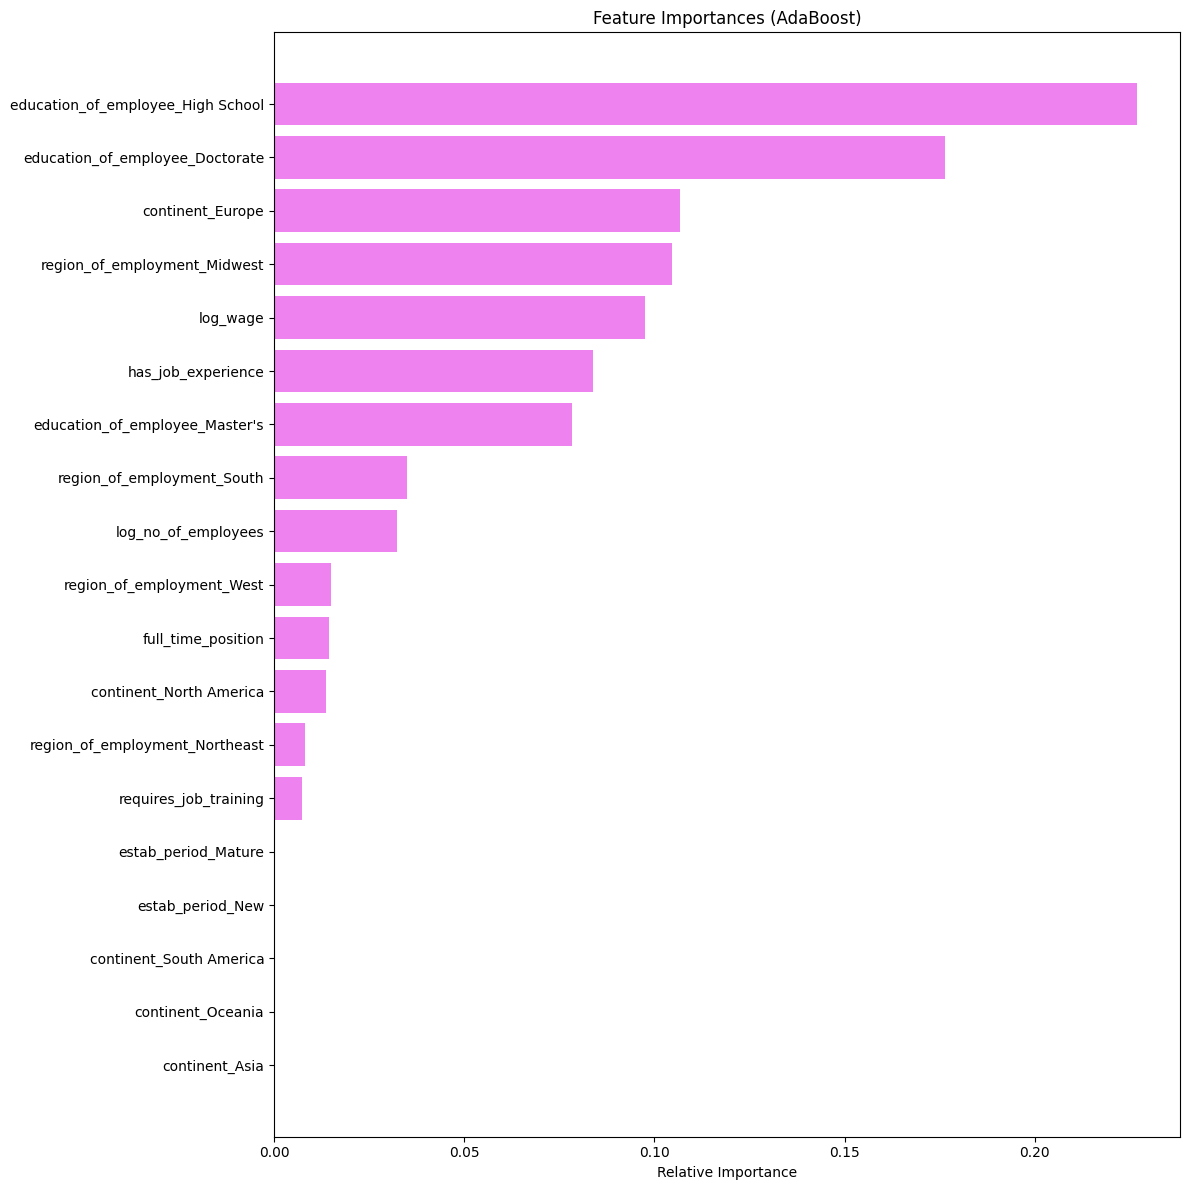

In [ ]:
#Get the trained AdaBoost model from the pipeline
ada_model = pipeline_ada.named_steps["classifier"]

# Set the feature names after preprocessing
# This handles OneHotEncoder + passthrough
ohe = pipeline_ada.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_cols = ohe.get_feature_names_out(categorical_columns)

all_feature_names = np.concatenate([
    encoded_cat_cols,
    binary_columns + numeric_columns  # already passed through
])

# Get feature importances from AdaBoost
importances = ada_model.feature_importances_
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(12, 12))
plt.title("Feature Importances (AdaBoost)")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


###Observations
The feature importance plot reveals that education level, especially "High School" and "Doctorate", are the most influential factors in determining visa case outcomes, suggesting that applicants with lower or very high academic backgrounds significantly affect model decisions. Geographical attributes like being from "Europe" or working in the "Midwest" also carry strong predictive weight. Wage-related features (log_wage and log_no_of_employees) and job experience contribute moderately, indicating the model accounts for both applicant background and company characteristics. Less importance is given to establishment period and certain continents, implying they add limited predictive value for visa approval decisions.

#Actionable Insights and Recommendations

###Insights

*   Education Level Strongly Influences Outcomes. Applicants with a Bachelor’s or Master’s degree are far more likely to have their visa approved. In contrast, applications from those with only a High School diploma or even a Doctorate show more variability in outcomes, likely due to role mismatch or overspecialization.
*   Higher Prevailing Wages Increase Approval Probability.A strong correlation exists between higher log-transformed wage offers and certification. This
indicates that higher-paying positions are viewed more favorably, likely due to perceived skill level and job importance.
*   Applicants with Prior Job Experience Are Favored. Those marked with prior experience are significantly more likely to be approved. This reduces training needs and signals readiness for employment.
*   Region of Employment Impacts Approval. Jobs located in the Midwest and Northeast regions show higher certification rates, potentially due to demand-supply dynamics or local policies.
*   Company Size Is a Trust Signal. Sponsoring companies with a larger number of employees (log_no_of_employees) tend to have more certified cases. This suggests that USCIS may associate company size with legitimacy or proven sponsorship history.
*   AdaBoost model achieved high recall with stable generalization, allowing EasyVisa to automate screening and identify high-likelihood approvals with confidence.

###Profile Recommendations
An applicant most likely to be certified would typically have:
*   A Bachelor’s or Master’s degree
*   A full-time position offer
*   Prior job experience in the field
*   A prevailing wage that reflects market standards or above
*   Employment located in the Midwest or Northeast
*   Sponsorship from a well-established company with a significant workforce

###Recommendation

*   Adopt the AdaBoost classifier as the primary prediction tool. It offers a strong balance between high recall and generalization, minimizing the risk of denying qualified applicants while avoiding overfitting.
*   Integrate the model into your intake system to flag high-likelihood certifications. This can help prioritize application reviews and assist consultants in advising clients more effectively.
*   Share findings with sponsoring employers so they understand how wage levels, job location, and experience influence outcomes. This can help them submit stronger applications.
*   Share findings with sponsoring employers so they understand how wage levels, job location, and experience influence outcomes. This can help them submit stronger applications.
*   Visa trends, policies, and applicant pools evolve. Retrain the model quarterly or semi-annually to maintain accuracy and fairness.
*   Create a user-friendly dashboard to visualize application trends, model predictions, and approval drivers. This supports transparency and internal decision-making.




